The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year
Missing Attribute Values: None

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#!wget --header='Host: doc-0o-9k-docs.googleusercontent.com' --header='User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' --header='Accept-Language: en-US,en;q=0.9,hi;q=0.8' --header='Referer: https://drive.google.com/drive/my-drive?fbclid=IwAR03vcoVWXPY0LIeU5XAJfrGXgOnwQRuZvq2taKkzp1bxCf2lSydTBDiFr0' --header='Cookie: AUTH_klcujf6pjp4mclvasni6kb7n323jmmbp_nonce=mhs2vo02050i6' --header='Connection: keep-alive' 'https://doc-0o-9k-docs.googleusercontent.com/docs/securesc/avo7jka99tkeb860koff6jeubdkhkedu/9laaetcedfm72leiov8cho3mir2aaq85/1594212450000/06797087907109954695/06797087907109954695/1iKlCSsd2_f49vEMGNng7Zd32KxqcITez?e=download&authuser=0&nonce=mhs2vo02050i6&user=06797087907109954695&hash=1bhvo1dv896iluj6k3ek5sbufmrjk56e' -c -O 'haberman.csv'

In [ ]:
!git clone "https://github.com/ajaysinggh/Applied_AI.git"

fatal: destination path 'Applied_AI' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv("Applied_AI//haberman.csv")
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


There are 4 features including class label/dependent variable.
<br>age - It represents age of patient at the time of operation(numerical)
<br>year - It represents year of operation(numerical)
<br>nodes - It tells no of +ve auxillry node detected(numerical)
<br>status - Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year



In [ ]:
## how many data-points and features?
df.shape

(306, 4)

In [ ]:
#what are the column names in the dataset?
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

1    225
2     81
Name: status, dtype: int64

 Percentage of patient's status: 
 AxesSubplot(0.125,0.125;0.775x0.755)


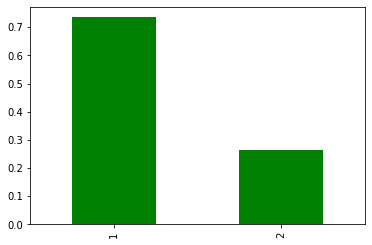

In [ ]:
##how many data points for each class are present?
## how  many patients survived after operation of breast cancer?
print(df.status.value_counts())
print("\n Percentage of patient's status: \n",df.status.value_counts(normalize =True).plot(kind='bar',color='g'))

The dataset is imbalanced as there are 73 % peaople survived and 26 % did not.

In [ ]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations :
<br> 1. The age of the patients is between 30-83 and most of them are of age 52
<br> 2. Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes
<br> 3. The dataset is imbalanced as the number of survived patients after the operation is 73%

# 2-D scatter plots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


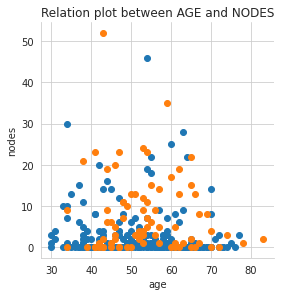

In [ ]:
sns.set_style('whitegrid') 
sns.FacetGrid(data =df,hue ='status',size = 4).map(plt.scatter,"age","nodes")
plt.title("Relation plot between AGE and NODES")
plt.show()

### There is no correlation between the age and nodes of the patients but some outliers can be detected from it.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


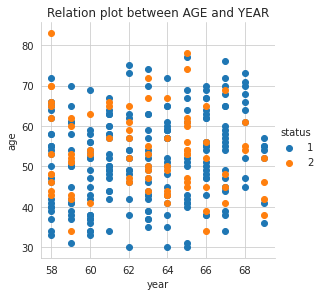

In [ ]:
sns.FacetGrid(data = df,hue = 'status',size = 4).map(plt.scatter,"year","age").add_legend()
plt.title("Relation plot between AGE and YEAR")
plt.show()

**observation for scatter plot :**
1. There is overlapping of the points so, cannot classify

# Pair plots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


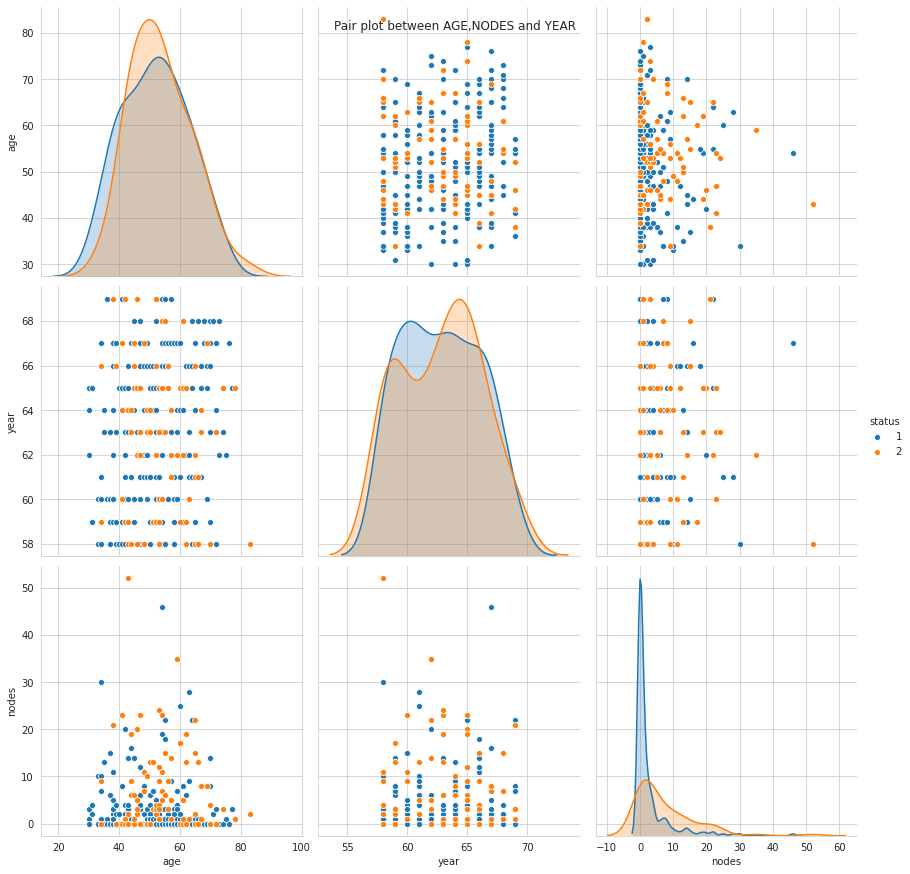

In [ ]:
sns.set_style('whitegrid');
sns.pairplot(df,hue = 'status',vars =["age","year","nodes"],size =4);
plt.suptitle("Pair plot between AGE,NODES and YEAR")
plt.show()

**observation**
1. person having less than 5 positive nodes have a high chance of surviving.
2. Person having age greater than 40 have extreme values of the nodes

# Histogram, PDF,CDF

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


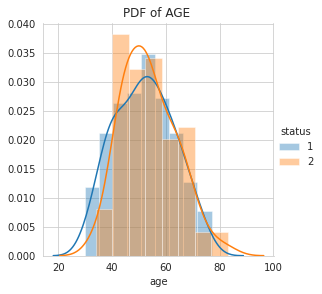

In [ ]:
#histogram of age
sns.FacetGrid(df,hue = "status" ,size =4).map(sns.distplot,"age").add_legend()
plt.title("PDF of AGE ")
plt.show()

### For both the classes of the status , patients having age between 35 to 75 have maximum chances

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


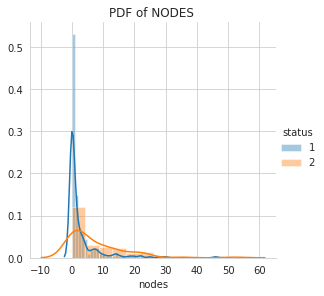

In [ ]:
# Histogram of nodes
sns.FacetGrid(df,hue ="status",size =4).map(sns.distplot,"nodes").add_legend()
plt.title("PDF of NODES ")
plt.show()

### Nodes in the patients for both status class is right skewed . Outliers impacts the distribution of the histogram.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


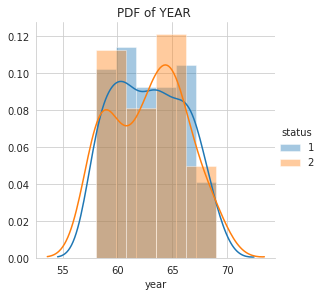

In [ ]:
#histogram for year

sns.FacetGrid(df,hue ="status",size =4).map(sns.distplot,"year").add_legend()
plt.title("PDF of YEAR ")
plt.show()

### **obsevartion**
### As the points are accumulated at number of nodes less than 5,means there is high chance of survival.

# PDF AND CDF

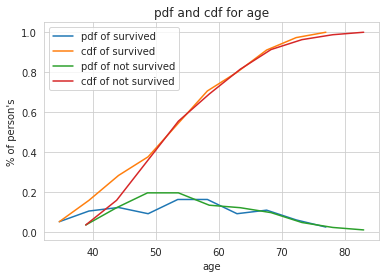

In [ ]:
#### PDF AND CDF OF AGE
df_survived = df.loc[df["status"] == 1]
df_not_survived = df.loc[df["status"] == 2]
label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]
counts, bin_edges = np.histogram(df_survived["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_not_survived["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()


[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


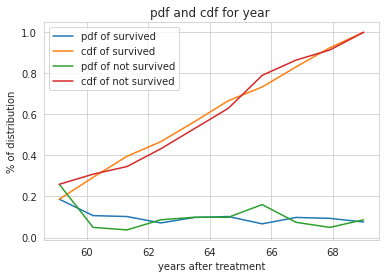

In [ ]:
#### PDF AND CDF OF YEAR
counts,bin_edges = np.histogram(df_survived["year"],bins =10,density =True)
pdf = counts/(sum(counts))
print(pdf)
print("\n",bin_edges)

cdf =np.cumsum(pdf)
label =["pdf of survived","cdf of survived","pdf of not survived","cdf of not survived"]
plt.title("pdf and cdf for year ")
plt.xlabel("years after treatment")
plt.ylabel("% of distribution")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(df_not_survived["year"],bins= 10,density =True)
pdf =counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)
plt.show()


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

 [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


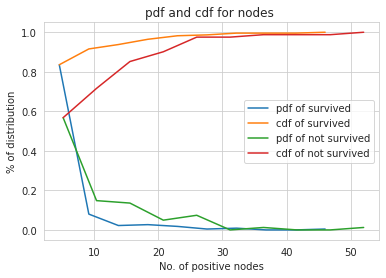

In [ ]:
#### PDF AND CDF OF NODES
counts,bin_edges = np.histogram(df_survived["nodes"],bins =10,density =True)
pdf = counts/(sum(counts))
print(pdf)
print("\n",bin_edges)

cdf =np.cumsum(pdf)
label =["pdf of survived","cdf of survived","pdf of not survived","cdf of not survived"]
plt.title("pdf and cdf for nodes ")
plt.xlabel("No. of positive nodes")
plt.ylabel("% of distribution")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(df_not_survived["nodes"],bins= 10,density =True)
pdf =counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)
plt.show()


# BOX PLOTS

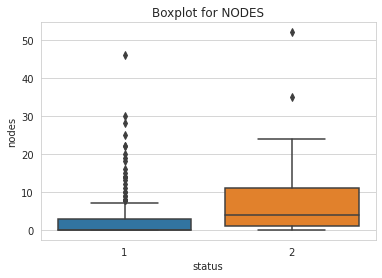

In [ ]:
sns.boxplot(x="status",y ="nodes",data = df)
plt.title("Boxplot for NODES")
plt.show()

**observation**
1. There are many outliers in the nodes column as most the patients has less than 5 positive nodes.
2. there is only one patient which has 52 positive nodes.

# VIOLIN PLOTS

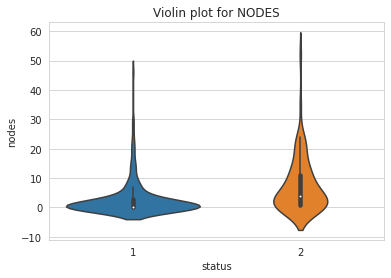

In [ ]:
sns.violinplot(x ="status",y= "nodes",data =df)
plt.title("Violin plot for NODES")
plt.show()

### Violin plot can be used for the measuring of the  distribution and percentiles of the data

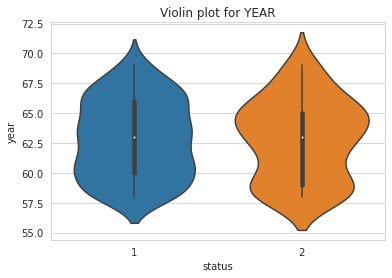

In [ ]:
sns.violinplot(x="status",y="year",data= df)
plt.title("Violin plot for YEAR")
plt.show()

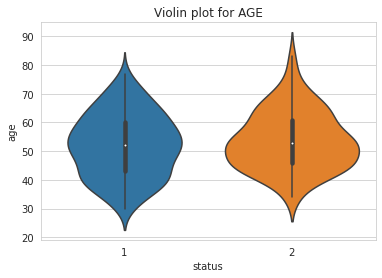

In [ ]:
sns.violinplot(x ="status",y ="age",data =df)
plt.title("Violin plot for AGE")
plt.show()

**observation**
1. As we can see the density plot of the positive nodes patients that have survived is high between 0-5.
2. This concludes that there are patients which have less than 5 positive nodes have a high chance of surviving.
3. As the nodes increases the chance of survival is less.

# Summarizing plots
## Objective :
* To predict whether the patient will survive after 5 years or not based upon the patient's age ,year of treatment and the number of positive nodes.
## Conclution:
* The dataset is imbalanced as it does not contain equal number of datapoints for each class.
* There is too much overlapping in the datapoints and hence it is difficult to classify by linear seperation.
* Only with the help of the nodes feature we are able to give some intutions.
* There are most of the patients which survived have less than 5 nodes.
* So in the end we can olny deduce that if the number of nodes is less,then the survival of the patients is high.

# Reference:
<br>https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis 
<br>https://www.kaggle.com/premvardhan/exploratory-data-analysis-haberman-s-survival 
<br>https://www.kaggle.com/vj1998/haberman-s-survival-exploratory-data-analysis
